In [6]:
import numpy as np
import matplotlib.pyplot as plt
from curvature_func import curvature
from normcd_func import normcd
from laplacian_func import laplacian
from evolve_vector_ENO3_func import evolve_vector_ENO3
from upwind_ENO3_func import upwind_ENO3
from drop_mover import evolve_vector
Nx=11
Ny=Nx
h=1/(Nx-1)
W=2*h
dt=0.001; tf=0.5;
bp=0.5
b=W*bp
W2_inv=1/(W**2)
xm=np.arange(0,1+h,h)
ym=np.arange(0,1+h,h)
x=np.arange(-0.1,1.1+h,h)
y=(1+np.cos(2*np.pi*(1-x)))/4
[X,Y]=np.meshgrid(xm,ym)
xc=.25; yc=.25; r=.15
phi = r - np.sqrt((X - xc )**2 + ( Y - yc )**2 )

#plt.contourf(X,Y,phi)
u_ext=1; v_ext=1; 
phi=np.where(phi>0.03,1,np.where(phi<-0.03,-1,0))

In [7]:
kappa= curvature(phi, h)
normphi = normcd(phi,h)
d2phi = laplacian(phi, h)
delta = evolve_vector_ENO3(phi, h, h, u_ext, v_ext)
mid_express=d2phi[1:-1, 1:-1] + W2_inv * phi[1:-1, 1:-1] * (1 - phi[1:-1, 1:-1] ** 2) - normphi[1:-1, 1:-1] * kappa[1:-1, 1:-1]
phi[1:-1, 1:-1] = phi[1:-1, 1:-1] + dt * (b * (mid_express) - delta[1:-1, 1:-1])

In [9]:
phi

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1],
       [-1,  0,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [-1,  0,  1,  0,  0, -1,  0, -1, -1, -1, -1],
       [-1,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1],
       [-1,  0,  0, -1, -1,  0,  0, -1, -1, -1, -1],
       [-1, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

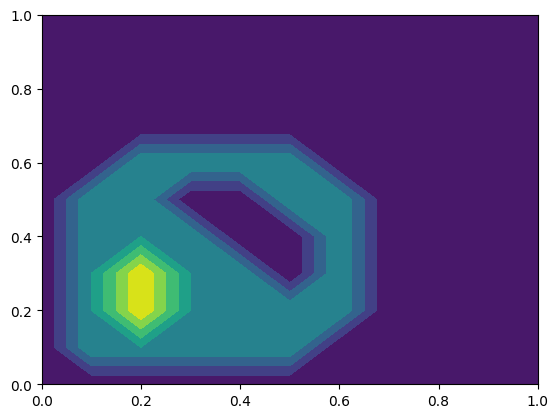

In [8]:
plt.contourf(X,Y,phi)

In [ ]:
plt.contourf(X,Y,phi,[0,0.5])
plt.colorbar()

In [ ]:
norm_phi.shape

In [ ]:
kappa.shape

In [ ]:
phi=evolve_vector(phi, h, u_ext, v_ext)

In [ ]:
upwind_ENO3(delta[3,:], u_ext, h).shape

In [ ]:
upwind_ENO3(delta[0+3,:], u_ext, h)

In [ ]:
1*np.ones(delta[3,:].shape)

In [ ]:
delta = np.zeros((np.shape(phi)[0]+6,np.shape(phi)[1]+6));
data_ext = np.zeros((np.shape(phi)[0]+6,np.shape(phi)[1]+6));
data_ext[3:-3,3:-3] = phi

In [ ]:
phi

In [ ]:

# first scan the rows
for i in range(phi.shape[0]):
    delta[i+3,:] = delta[i+3,:] + upwind_ENO3(data_ext[i+3,:], u_ext, dx);
# then scan the columns
for j in range(phi.shape[1]):
    delta[:,j+3] = delta[:,j+3] + upwind_ENO3(data_ext[:,j+3], v_ext, dy);
delta = delta[3:-3,3:-3];
return delta

In [10]:
[X,Y,W,Z]=np.meshgrid(xm,ym,xm,ym)

In [11]:
X.shape

(11, 11, 11, 11)

In [12]:
Y.shape

(11, 11, 11, 11)